# Power Calculation

---
#### NOTE :
In this example the student is guided to appreciate the impact of the noise levels in the calculation of signals, and how this can impact the magnitudes that are derived from calculations (propagation of the error).

## Some python initializations
Well, we hope here that you like programming languages. There are always many options, but python is easy to understand and versatile. And the most important: works well with Jupyterlab.
Let's start with some imports...

In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

The following function includes the formulas we need to calculate our variables that are going to be used

interactive(children=(IntSlider(value=50, description='frequency', max=60, min=40, step=0), IntSlider(value=50…

<function __main__.update(frequency=50, frequency_sample=50, peak_voltage=398)>

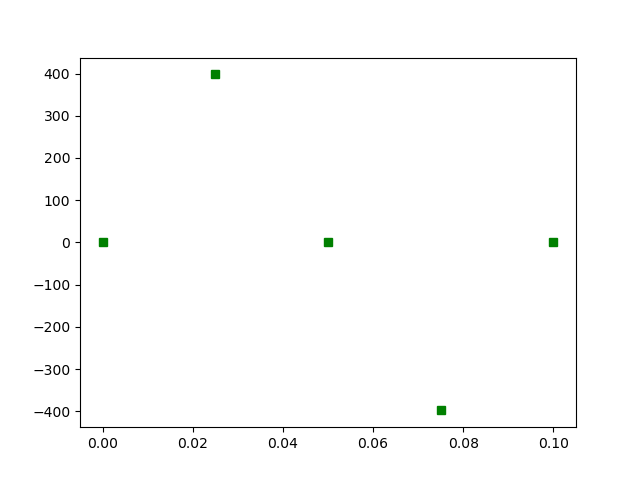

In [12]:
def f(frequency,frequency_sample,peak_voltage):
    period_sample=1/frequency_sample
    time=np.linspace(0, 5/frequency,5*int(frequency_sample/frequency))
    voltage = peak_voltage*np.sin(2*np.pi*frequency*time)
    return time, voltage


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
time, voltage = f(frequency=50, frequency_sample=50, peak_voltage=398)
line, = ax.plot(time, voltage, 's',color='green')

def update(frequency = 50, frequency_sample = 50, peak_voltage=398):
    time, voltage = f(frequency,frequency_sample,peak_voltage)
    line.set_ydata(voltage)
    line.set_xdata(time)
    fig.canvas.draw()
    fig.canvas.flush_events() 
    
interact(update, 
         frequency=widgets.IntSlider(min=40, max=60, step=0.1, value=50),
         calculation_periods=widgets.IntSlider(min=1, max=10, step=1, value=5),
         frequency_sample=widgets.IntSlider(min=10, max=5000, step=1, value=50),
         peak_voltage=widgets.IntSlider(min=100, max=1000, step=1, value=398)
        )

interactive(children=(IntSlider(value=50, description='frequency', max=60, min=40, step=0), IntSlider(value=50…

<function __main__.update_c(frequency=50, frequency_sample=50, peak_current=10)>

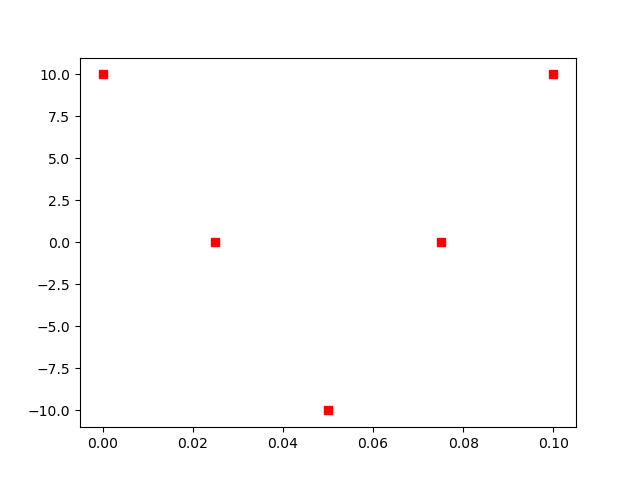

In [13]:
def g(frequency,frequency_sample,peak_current):
    period_sample=1/frequency_sample
    time=np.linspace(0, 5/frequency,5*int(frequency_sample/frequency))
    current = peak_current*np.sin(2*np.pi*frequency*time+np.pi/2)
    return time, current


fig_c = plt.figure()
ax_c = fig_c.add_subplot(1, 1, 1)
time, current = g(frequency=50, frequency_sample=50, peak_current=10)
line_c, = ax_c.plot(time, current, 's',color='red')

def update_c(frequency = 50, frequency_sample = 50, peak_current=10):
    time, current = g(frequency,frequency_sample,peak_current)
    line_c.set_ydata(current)
    line_c.set_xdata(time)
    fig_c.canvas.draw()
    fig_c.canvas.flush_events() 
    
interact(update_c, 
         frequency=widgets.IntSlider(min=40, max=60, step=0.1, value=50),
         frequency_sample=widgets.IntSlider(min=10, max=5000, step=1, value=50),
         peak_current=widgets.IntSlider(min=0.1, max=16, step=0.1, value=10)
        )

## Let's generate the signal:

In [2]:
# %matplotlib widget
%matplotlib inline

out = widgets.Output()
# t0, num_periods, v_amp, curr_amp, frequency, v_noise_pct, curr_noise_pct = None
def display_params():
    out.clear_output()
    # global t0, num_periods, v_amp, curr_amp, frequency, v_noise_pct, curr_noise_pct
    t0 = 1/freq.value
    num_periods = N.value
    v_amp = v_rms.value
    curr_amp = curr_rms.value
    frequency = freq.value
    v_noise_pct = noise_pct_v.value
    curr_noise_pct = noise_pct_curr.value
    
    t = np.arange(0,num_periods*t0,t0/50)
    # voltage
    u = (v_amp*np.sqrt(2))*np.sin(2*np.pi*frequency*t)
    y = v_noise_pct*0.01*v_amp*np.random.randn(1,len(t))
    u=np.add(u,y)   # add the noise to the voltage
    u=u.flatten()   # make it vector to plot with time
    # current
    i=curr_amp*np.sqrt(2)*np.sin(2*np.pi*frequency*t);
    y2=0.01*curr_amp*curr_noise_pct*np.random.randn(1,len(t));
    i=np.add(i,y2)
    i=i.flatten()
    power=np.multiply(u,i);
    
    with out:
        plt.rcParams["figure.figsize"] = (12,8) # resize the plots
        fig, (ax1,ax2, ax3) = plt.subplots(3,1,layout='constrained', sharex=True)
        ax1.plot(t, u)
        ax1.set_ylabel('Voltage')
        ax2.plot(t, i)
        ax2.set_ylabel('Current')
        ax3.plot(t, power)
        ax3.set_ylabel('Power')
        ax3.set_xlabel('Time(s) ->')
        ax1.grid()
        ax2.grid()
        ax3.grid()
        plt.show() # display all the plots

items_layout = Layout( width='auto') # override the default width of the button to 'auto' to let the button grow
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-around')

#elements in the form
freq = BoundedIntText(value=60, min=0, step=1, description='Frequency:', disabled=False)
N = BoundedIntText(value=20, min=0, step=1, description='No. of periods:', disabled=False)
v_rms = BoundedIntText(value=50, min=0, step=1, description='RMS Voltage:', disabled=False)
curr_rms = BoundedIntText(value=50, min=0, step=1, description='RMS Currnet:', disabled=False)
noise_pct_v = BoundedIntText(value=30, min=0, step=1, description='Noise(V) %:', disabled=False)
noise_pct_curr = BoundedIntText(value=30, min=0, step=1, description='Noise(I) %:', disabled=False)
btn = Button(description="Generate Plot",style=ButtonStyle(button_color='moccasin'))

#columns in the form with Box element
form_items = [Box([freq, N], layout=form_item_layout),
    Box([v_rms , curr_rms], layout=form_item_layout),
    Box([noise_pct_v, noise_pct_curr], layout=form_item_layout),
    Box([ btn], layout=form_item_layout),
    Box([ out], layout=form_item_layout)]
#formatting the form as Box
form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    # align_items='space-around',
    align_content='stretch',
    width='100%'))

# generate button
def on_button_clicked(p):
    display_params()

btn.on_click(on_button_clicked)



form


Box(children=(Box(children=(BoundedIntText(value=60, description='Frequency:'), BoundedIntText(value=20, descr…